In [1]:
import re
from glob import glob
import numpy as np
import os
import matplotlib.pyplot as plt

def get_losses(log_paths):
    assert len(log_paths) == 25
    
    log_paths = sorted(log_paths)
    losses = {}
    for idx, log_path in enumerate(log_paths):
        with open(log_path, 'r') as stream:
            lines = [line.strip() for line in stream.readlines()]
        
        lines = [line for line in lines if 'loss' in line]
        
        losses_ = [re.findall("\d+\.\d+", line) for line in lines]
            
        losses_ = [float(loss[0]) for loss in losses_ if len(loss) == 1]
                
        train_loss = losses_[0::2]
        val_loss = losses_[1::2]
        
        assert len(train_loss) == len(val_loss)

        losses[idx] = {'train': train_loss, 'val': val_loss}

    return losses

def get_means(list_of_nums):
    
    max_len = max([len(foo) for foo in list_of_nums])
    
    means = [[] for _ in range(max_len)]
    
    for nums in list_of_nums:
        for idx, num in enumerate(nums):
            means[idx].append(num)

    stds = [np.std(nums) for nums in means if len(nums) == 25]
    means = [np.mean(nums) for nums in means if len(nums) == 25]

    return {'means': means, 'stds': stds}

def get_logs():
    keys = [key for key in glob('../training-results/*') if key not in ['../training-results/.gitignore', '../training-results/TRAINING-RESULTS.md']]
    
    logs = {}
    
    for key in keys:
        logs[key] = glob(os.path.join(key, 'cross-val/*/log/ResMLP/*/info.log'))
        
    logs = {'scratch': {key: [v for v in val if 'scratch' in v] for key, val in logs.items()}, 
            'pre-trained': {key: [v for v in val if 'pre-trained' in v] for key, val in logs.items()}}
        
    return logs

In [2]:
losses = {}

for trained in ['scratch', 'pre-trained']:
    losses[trained] = {}
    for key, val in get_logs()[trained].items():
        losses_ = get_losses(val)
        
        train = get_means([val['train'] for key, val in losses_.items()])
        val = get_means([val['val'] for key, val in losses_.items()])
        losses[trained][key] = {'train': train, 'val': val}

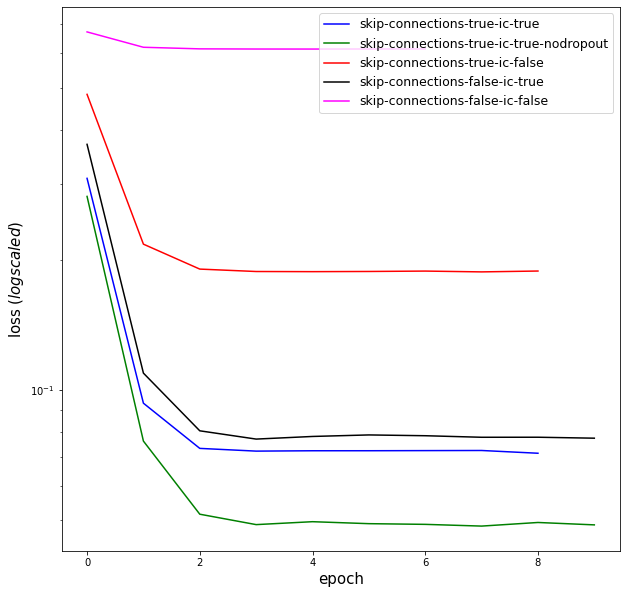

In [3]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['scratch']['../training-results/gender-add-residual-true-add-ic-true']['train']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='solid');
plt.plot(losses['scratch']['../training-results/gender-add-residual-true-add-ic-true-nodropout']['train']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='solid');
plt.plot(losses['scratch']['../training-results/gender-add-residual-true-add-ic-false']['train']['means'], label='skip-connections-true-ic-false', color='red', linestyle='solid');
plt.plot(losses['scratch']['../training-results/gender-add-residual-false-add-ic-true']['train']['means'], label='skip-connections-false-ic-true', color='black', linestyle='solid');
plt.plot(losses['scratch']['../training-results/gender-add-residual-false-add-ic-false']['train']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='solid');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('gender-scratch-train.pdf')

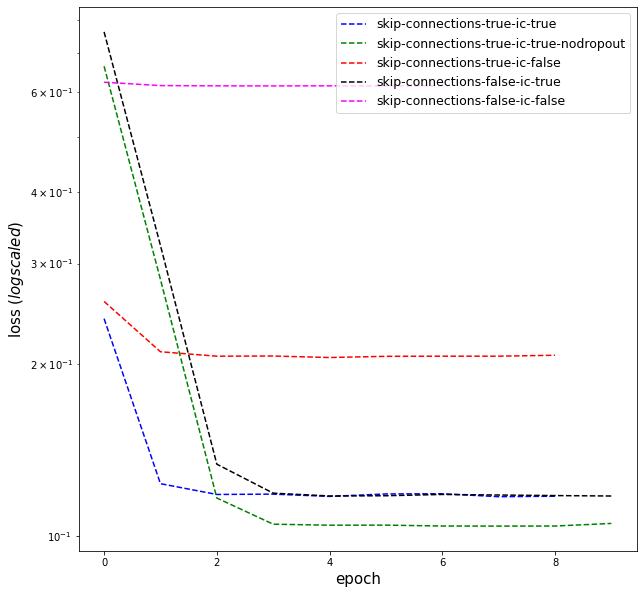

In [4]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['scratch']['../training-results/gender-add-residual-true-add-ic-true']['val']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/gender-add-residual-true-add-ic-true-nodropout']['val']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/gender-add-residual-true-add-ic-false']['val']['means'], label='skip-connections-true-ic-false', color='red', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/gender-add-residual-false-add-ic-true']['val']['means'], label='skip-connections-false-ic-true', color='black', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/gender-add-residual-false-add-ic-false']['val']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='dashed');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('gender-scratch-val.pdf')

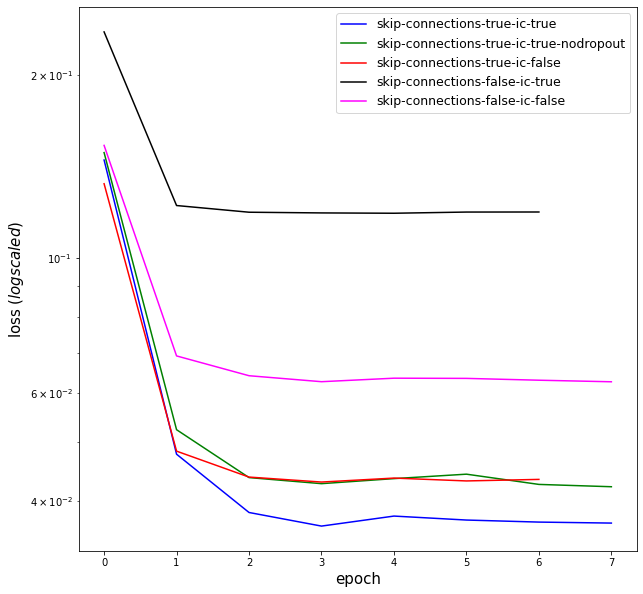

In [5]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['pre-trained']['../training-results/gender-add-residual-true-add-ic-true']['train']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-true-add-ic-true-nodropout']['train']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-true-add-ic-false']['train']['means'], label='skip-connections-true-ic-false', color='red', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-false-add-ic-true']['train']['means'], label='skip-connections-false-ic-true', color='black', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-false-add-ic-false']['train']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='solid');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('gender-pretrained-train.pdf')

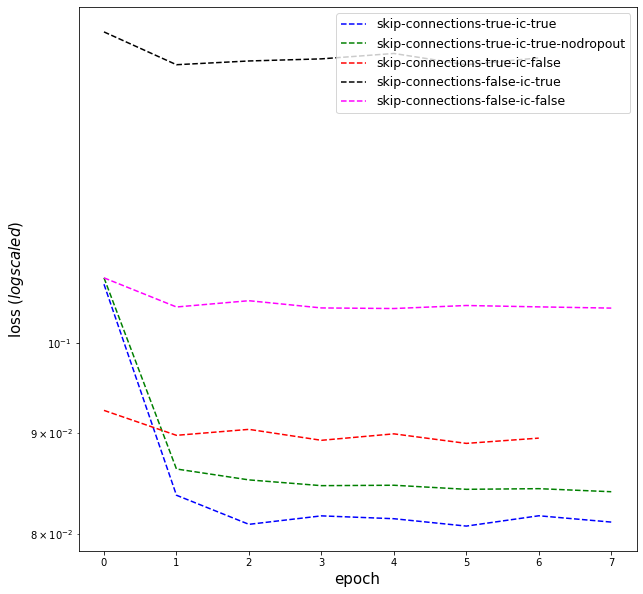

In [6]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['pre-trained']['../training-results/gender-add-residual-true-add-ic-true']['val']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-true-add-ic-true-nodropout']['val']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-true-add-ic-false']['val']['means'], label='skip-connections-true-ic-false', color='red', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-false-add-ic-true']['val']['means'], label='skip-connections-false-ic-true', color='black', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/gender-add-residual-false-add-ic-false']['val']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='dashed');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('gender-pretrained-val.pdf')

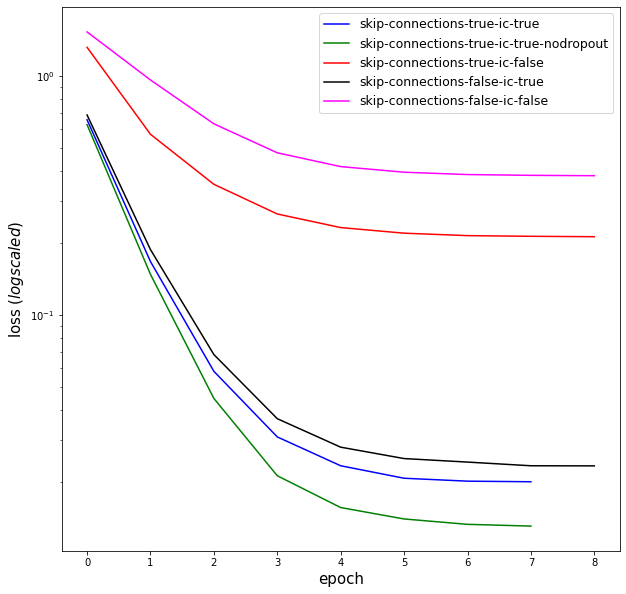

In [7]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['scratch']['../training-results/age-8-add-residual-true-add-ic-true']['train']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-true-add-ic-true-nodropout']['train']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-true-add-ic-false']['train']['means'], label='skip-connections-true-ic-false', color='red', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-false-add-ic-true']['train']['means'], label='skip-connections-false-ic-true', color='black', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-false-add-ic-false']['train']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='solid');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-8-scratch-train.pdf')

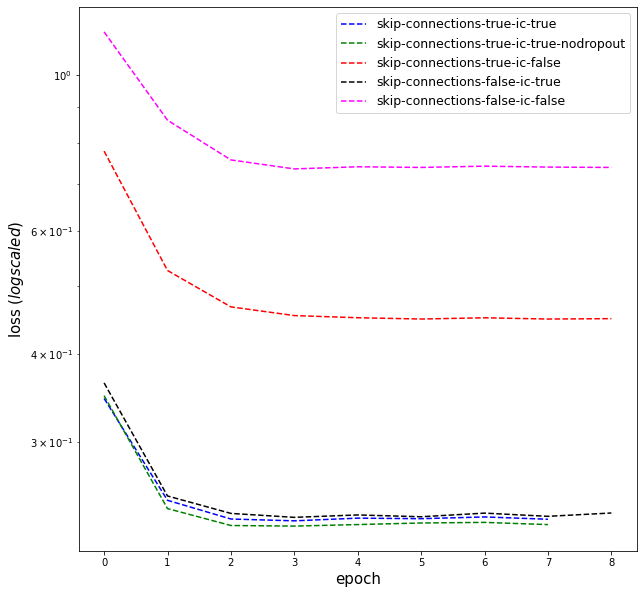

In [8]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['scratch']['../training-results/age-8-add-residual-true-add-ic-true']['val']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-true-add-ic-true-nodropout']['val']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-true-add-ic-false']['val']['means'], label='skip-connections-true-ic-false', color='red', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-false-add-ic-true']['val']['means'], label='skip-connections-false-ic-true', color='black', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-8-add-residual-false-add-ic-false']['val']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='dashed');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-8-scratch-val.pdf')

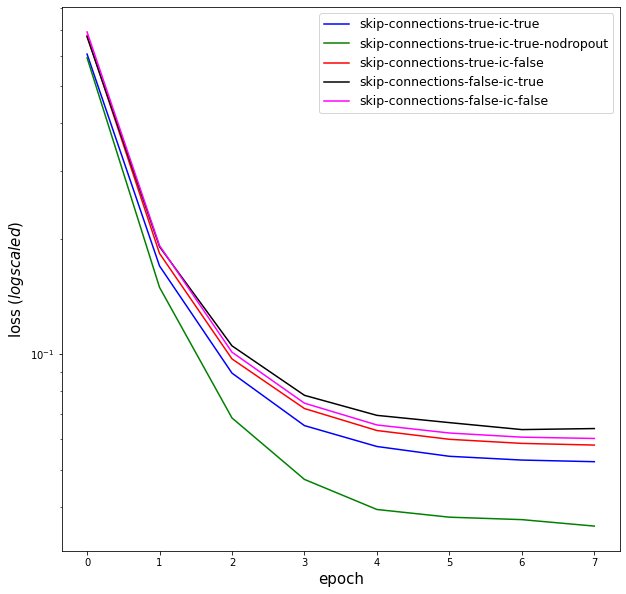

In [9]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-true-add-ic-true']['train']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-true-add-ic-true-nodropout']['train']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-true-add-ic-false']['train']['means'], label='skip-connections-true-ic-false', color='red', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-false-add-ic-true']['train']['means'], label='skip-connections-false-ic-true', color='black', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-false-add-ic-false']['train']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='solid');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-8-pretrained-train.pdf')

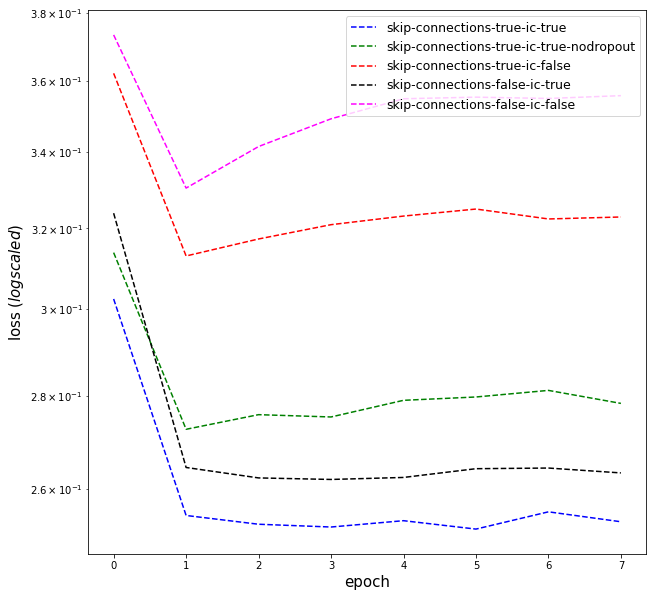

In [10]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-true-add-ic-true']['val']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-true-add-ic-true-nodropout']['val']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-true-add-ic-false']['val']['means'], label='skip-connections-true-ic-false', color='red', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-false-add-ic-true']['val']['means'], label='skip-connections-false-ic-true', color='black', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-8-add-residual-false-add-ic-false']['val']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='dashed');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-8-pretrained-val.pdf')

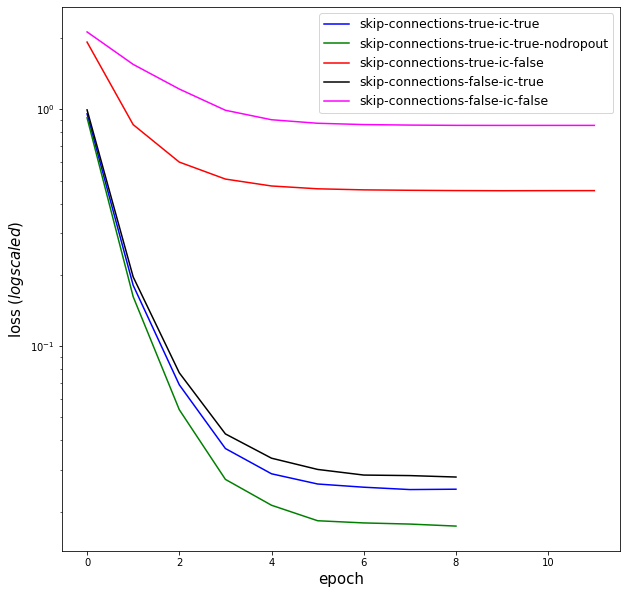

In [11]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['scratch']['../training-results/age-101-add-residual-true-add-ic-true']['train']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-true-add-ic-true-nodropout']['train']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-true-add-ic-false']['train']['means'], label='skip-connections-true-ic-false', color='red', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-false-add-ic-true']['train']['means'], label='skip-connections-false-ic-true', color='black', linestyle='solid');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-false-add-ic-false']['train']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='solid');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-101-scratch-train.pdf')

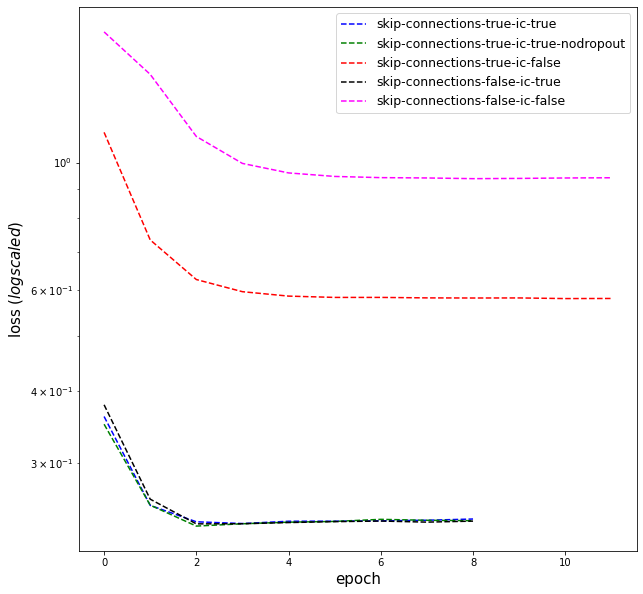

In [12]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['scratch']['../training-results/age-101-add-residual-true-add-ic-true']['val']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-true-add-ic-true-nodropout']['val']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-true-add-ic-false']['val']['means'], label='skip-connections-true-ic-false', color='red', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-false-add-ic-true']['val']['means'], label='skip-connections-false-ic-true', color='black', linestyle='dashed');
plt.plot(losses['scratch']['../training-results/age-101-add-residual-false-add-ic-false']['val']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='dashed');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-101-scratch-val.pdf')

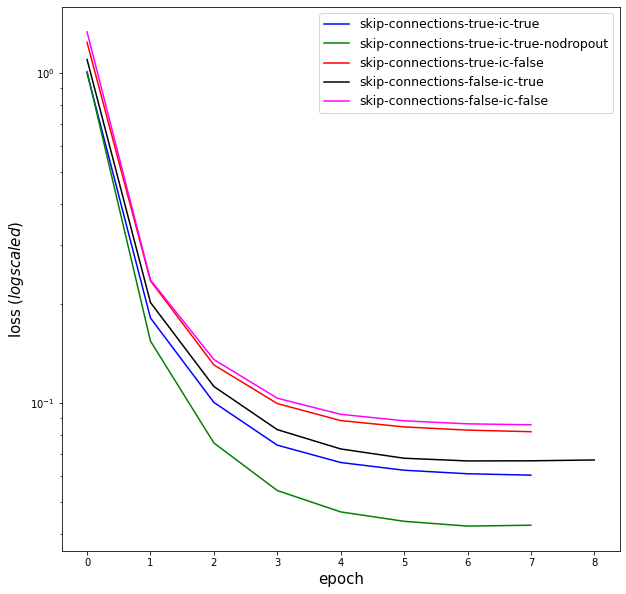

In [13]:
fig = plt.figure(figsize=(10, 10));

plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-true-add-ic-true']['train']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-true-add-ic-true-nodropout']['train']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-true-add-ic-false']['train']['means'], label='skip-connections-true-ic-false', color='red', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-false-add-ic-true']['train']['means'], label='skip-connections-false-ic-true', color='black', linestyle='solid');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-false-add-ic-false']['train']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='solid');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-101-pretrained-train.pdf')

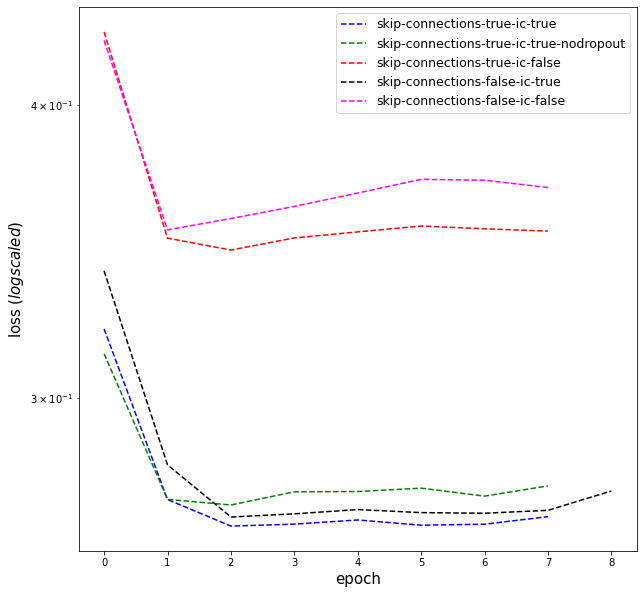

In [14]:
fig = plt.figure(figsize=(10, 10));
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-true-add-ic-true']['val']['means'], label='skip-connections-true-ic-true', color='blue', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-true-add-ic-true-nodropout']['val']['means'], label='skip-connections-true-ic-true-nodropout', color='green', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-true-add-ic-false']['val']['means'], label='skip-connections-true-ic-false', color='red', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-false-add-ic-true']['val']['means'], label='skip-connections-false-ic-true', color='black', linestyle='dashed');
plt.plot(losses['pre-trained']['../training-results/age-101-add-residual-false-add-ic-false']['val']['means'], label='skip-connections-false-ic-false', color='magenta', linestyle='dashed');

plt.yscale('log')
plt.legend(loc='upper right', fontsize=12.5);
plt.ylabel('loss $\it(log scaled)$', fontsize=15);
plt.xlabel('epoch', fontsize=15);
plt.savefig('age-101-pretrained-val.pdf')